<a href="https://colab.research.google.com/github/ellendupont/COVID-19/blob/master/DS4ph_bme_Assn7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python notebook for DS4PH-BME Assignment 7

Perform these questions in a colab notebook using python

- Consider the shhs.txt datset distributed over the Teams site. 
- Use linear regression with bmi to predict log(rdi4p + 1). 
- Report the coefficients and a scatterplot with the fitted line. 
- Using your formula from the previous question, predict rdi4p for a person with a bmi = 30

So: import dataset, run linear regression, report coef and plot, predict for bmi = 30, save to GitHub course assignment repo.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as smod
import seaborn as sb 

#Import the sleep health data set
dat = pd.read_csv("shhs.txt")
dat.head(4)
dat.dtypes

pptid          object
clinic          int64
Waist          object
COPD15         object
ASTHMA15       object
slp_lat        object
time_bed      float64
timest1p       object
timest2p       object
times34p       object
timeremp       object
rdi4p         float64
StLOutP         int64
StOnsetP        int64
SlpPrdP         int64
Staging1       object
Staging2       object
Staging3       object
Staging4       object
Staging5       object
RestAn1        object
RestAn2        object
RestAn3        object
RestAn4        object
HTN            object
CVD            object
CHD            object
sex             int64
age            object
smokstatus     object
bmi            object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


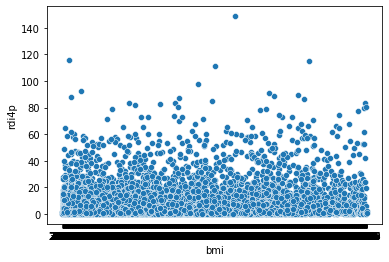

In [4]:
# Now plot it 
sb.scatterplot(dat['bmi'] , dat['rdi4p'])

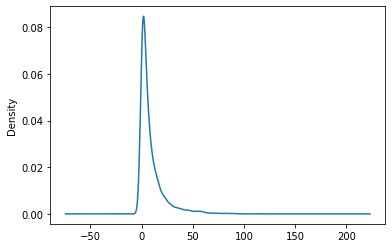

In [19]:
dat.rdi4p.plot.density()

In [44]:
# Now trim data set
dat = dat.drop(['pptid', 'ASTHMA15', 'slp_lat', 'time_bed', 'Staging2', 'Staging3', 'Staging4', 'Staging5'], axis=1)
dat.head(5)

,clinic,Waist,COPD15,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,RestAn1,RestAn2,RestAn3,RestAn4,HTN,CVD,CHD,sex,age,smokstatus,bmi
0,41,86,0,6.258322,60.852196,19.30759,13.581891,1.438083,28,28,22530,0,1,0,0,0,1,0,0,1,55,Former,21.78
1,41,107,0,0.824176,65.65934,16.758242,16.758242,17.802198,0,0,10920,.,.,.,.,.,1,0,0,1,78,Never,32.95
2,41,82,0,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,21510,1,1,0,0,0,0,0,0,0,77,Never,24.11
3,41,85,0,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,18060,1,1,0,0,0,1,0,0,1,48,Never,20.19
4,41,76,0,5.675676,68.648651,13.378378,12.297297,2.756757,7,20,22200,1,1,0,0,0,1,0,0,0,66,Former,23.31


In [45]:
dat = dat[['age', 'bmi', 'Waist', 'rdi4p', 'sex']]
dat.head(5)

,age,bmi,Waist,rdi4p,sex
0,55,21.78,86,1.438083,1
1,78,32.95,107,17.802198,1
2,77,24.11,82,4.853556,0
3,48,20.19,85,0.797342,1
4,66,23.31,76,2.756757,0


In [47]:
# now create new variable
dat = dat.assign(rdi4p_plus1 = dat.rdi4p + 1)
dat = dat.assign(log_rdi4p_plus1 = np.log(dat.rdi4p_plus1))
dat.head(3)

,age,bmi,Waist,rdi4p,sex,rdi4p_plus1,log_rdi4p_plus1
0,55,21.78,86,1.438083,1,2.438083,0.891212
1,78,32.95,107,17.802198,1,18.802198,2.933974
2,77,24.11,82,4.853556,0,5.853556,1.767049


In [48]:
dat.dropna()

,age,bmi,Waist,rdi4p,sex,rdi4p_plus1,log_rdi4p_plus1
0,55,21.78,86,1.438083,1,2.438083,0.891212
1,78,32.95,107,17.802198,1,18.802198,2.933974
2,77,24.11,82,4.853556,0,5.853556,1.767049
3,48,20.19,85,0.797342,1,1.797342,0.586309
4,66,23.31,76,2.756757,0,3.756757,1.323556
...,...,...,...,...,...,...,...
6436,66,25.69,99,34.415782,1,35.415782,3.567158
6437,54,26.73,99,13.653603,1,14.653603,2.684686
6438,55,24.23,91,2.163462,1,3.163462,1.151667
6439,53,25.37,93,1.038319,1,2.038319,0.712125


In [51]:
dat = dat[dat.bmi != '.']
dat = dat[dat.Waist != '.']
dat.sort_values(by=['Waist'])

,age,bmi,Waist,rdi4p,sex,rdi4p_plus1,log_rdi4p_plus1
922,52,27.94,100,6.059276,1,7.059276,1.954342
944,46,29.15,100,4.322470,1,5.322470,1.671937
5971,61,29.1,100,4.296675,1,5.296675,1.667079
3060,86,27.85,100,4.405063,0,5.405063,1.687336
5978,69,31.15,100,24.646983,0,25.646983,3.244426
...,...,...,...,...,...,...,...
4980,76,29.83,99.695,16.470588,0,17.470588,2.860519
4922,69,26.52,99.695,20.342466,1,21.342466,3.060699
4719,77,30.5,99.695,13.130194,1,14.130194,2.648314
5559,58,28.76,99.7,8.205128,1,9.205128,2.219761


In [58]:
dat.sort_values(by=['bmi'])

,age,bmi,Waist,rdi4p,sex,rdi4p_plus1,log_rdi4p_plus1
2412,49,12.03,92.0,0.318725,1,1.318725,0.276665
461,60,12.08,98.0,0.715706,1,1.715706,0.539825
4357,62,15.87,65.0,0.285036,0,1.285036,0.250786
3371,65,16.00,74.0,5.611511,0,6.611511,1.888812
5371,43,16.61,68.6,1.445783,0,2.445783,0.894365
...,...,...,...,...,...,...,...
850,70,56.20,93.0,6.518106,0,7.518106,2.017314
387,45,56.85,121.0,7.751938,0,8.751938,2.169275
3304,49,57.45,114.0,12.123711,0,13.123711,2.574421
3336,49,57.72,134.0,15.609756,0,16.609756,2.809990


In [56]:
# Now fix the data types

dat['bmi'] = dat.bmi.astype(float, errors='raise')
dat['Waist'] = dat.Waist.astype(float, errors='raise')
dat['age'] = dat.age.astype(int, errors='raise')
print(dat.dtypes)

age                  int64
bmi                float64
Waist              float64
rdi4p              float64
sex                  int64
rdi4p_plus1        float64
log_rdi4p_plus1    float64
dtype: object


In [61]:
# Now run the regression
fit = sm.OLS('log_rdi4p_plus1 ~ bmi', data = dat)
fit = sm.OLS(dat.log_rdi4p_plus1, )
fit.summary()
smod.regression.linear_model.pred()

ValueError: ignored

In [60]:
import statsmodels as smod
